# Tracer Variance budgets

In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid
from xarrayutils import aggregate
import copy
# Pseudo Inversion 
from scipy.linalg import pinv, eig

ModuleNotFoundError: No module named 'xarrayutils'

In [22]:
data_dir = '/swot/SUM05/dbalwada/channel_model_output/varying_res/05km/multi_tracer_montly_restored/multi_tracer/'

# brief comment on how often was the model data saved 
# the mode outputs fields every 5 days, averages are also
# calculated over 5 days (*this creates stupid amounts of 
# unnecessary data, and was definitely a terrible idea in hidsight).

iters = range(10473120, 10473120+8640, 1440)
model_vars = ['PTRACER01']
ds_1month = open_mdsdataset(data_dir , delta_t=300, iters=iters, 
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

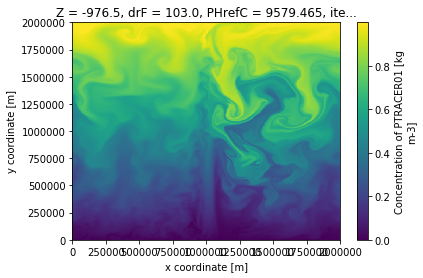

In [18]:
ds_model.PTRACER01.isel(time=4, Z=20).plot()

In [23]:
# tracer advected for longer
data_dir = '/swot/SUM05/dbalwada/channel_model_output/varying_res/05km/multi_tracer/'

# brief comment on how often was the model data saved 
# the mode outputs fields every 5 days, averages are also
# calculated over 5 days (*this creates stupid amounts of 
# unnecessary data, and was definitely a terrible idea in hidsight).

model_vars = ['PTRACER01']
ds_6month = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

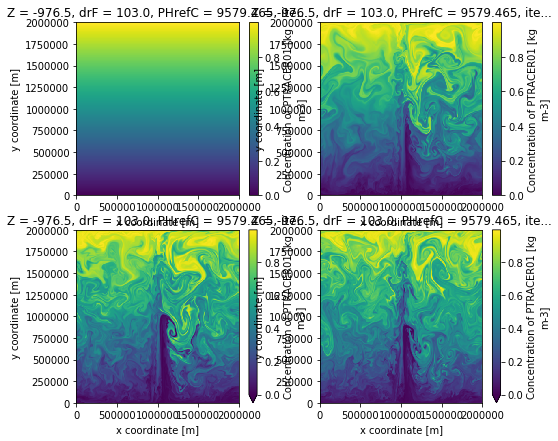

In [53]:
plt.figure(figsize=(8,7))

plt.subplot(221)
ds_6month.PTRACER01.isel(Z=20, time=-4).plot(vmin=0)

plt.subplot(222)
ds_6month.PTRACER01.isel(Z=20, time=-3).plot(vmin=0)

plt.subplot(223)
ds_6month.PTRACER01.isel(Z=20, time=-2).plot(vmin=0)

plt.subplot(224)
ds_6month.PTRACER01.isel(Z=20, time=-1).plot(vmin=0)

In [46]:
trac_var = ds_6month.PTRACER01.isel(Z=20).sel(XC=slice(50e3,150e3), 
                    YC=slice(950e3,1050e3)).var(['XC','YC'])

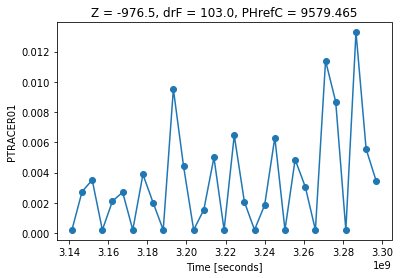

In [47]:
trac_var.plot(marker='o')